In [4]:

import pandas as pd

data = pd.read_csv('dataset.csv')

data.head(1)

data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
data.Type.unique()


array(['M', 'L', 'H'], dtype=object)

In [17]:
data



,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,power,temperature_diff,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,66382.8,10.5,False,True
1,2,L47181,298.2,308.7,1408,46.3,3,0,65190.4,10.5,True,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,74001.2,10.4,True,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,56603.5,10.4,True,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,56320.0,10.5,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,47318.0,9.6,False,True
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,51897.6,9.5,False,False
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,54943.0,9.6,False,True
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,68288.0,9.7,False,False


## We Explore and Clean the data

In [6]:
data.isnull().sum() # no null values

data.Type.unique() #['M', 'L', 'H'] everything good!



#convert Type to category





data['power'] = data['Rotational speed [rpm]'] * data['Torque [Nm]']

data['temperature_diff'] = data['Process temperature [K]'] - data['Air temperature [K]']

#drop coulums(Instincts)

data = data.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])

data.info()
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   power                    10000 non-null  float64
 10  temperature_diff         10000 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 859.5+ KB


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'power', 'temperature_diff'],
      dtype='object')

## Exploratory Data Analysis

<Axes: >

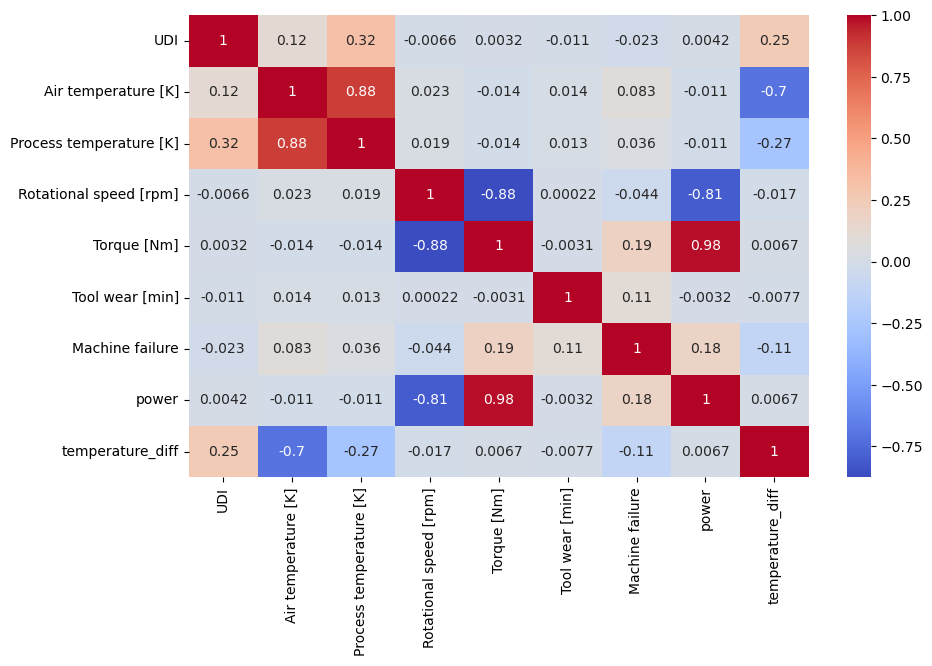

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 6))

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

## Features Engineering

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

data = pd.get_dummies(data, columns=['Type'], drop_first=True)
data

X = data.drop(columns=['UDI', 'Product ID', 'Machine failure'])

y = data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train)

# Clean feature names
X_train.columns = X_train.columns.str.replace('[', '', regex=False)
X_train.columns = X_train.columns.str.replace(']', '', regex=False)
X_train.columns = X_train.columns.str.replace('<', '', regex=False)

# Apply the same cleaning to X_test
X_test.columns = X_test.columns.str.replace('[', '', regex=False)
X_test.columns = X_test.columns.str.replace(']', '', regex=False)
X_test.columns = X_test.columns.str.replace('<', '', regex=False)



dtrain = xgb.DMatrix(data=X_train, label=y_train)

dtest = xgb.DMatrix(data=X_test)

params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'eta': 0.1,  
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'eval_metric': 'logloss'
}


num_boost_round = 100





      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
9069                297.2                    308.2                    1678   
2603                299.3                    309.2                    1334   
7738                300.5                    312.0                    1263   
1579                298.3                    308.3                    1444   
5058                303.9                    312.9                    1526   
...                   ...                      ...                     ...   
5734                302.3                    311.8                    1369   
5191                304.0                    313.2                    1416   
5390                302.8                    312.3                    1483   
860                 296.1                    306.9                    1541   
7270                300.2                    310.4                    1808   

      Torque [Nm]  Tool wear [min]    power  temperature_diff  

## Cross-Validation


In [9]:
cv_result =  xgb.cv(params=params, dtrain=dtrain,
                    num_boost_round=num_boost_round, nfold=5,
                    metrics="error", seed=42)


cv_accuracy = float(1 -  cv_result['test-error-mean'].iloc[-1])



cv_accuracy

print(f" Cross-Validation Accurac: {cv_accuracy:.4f} ")








 Cross-Validation Accurac: 0.9874 


## Training Our Model 

In [10]:
model = xgb.train(dtrain = dtrain, params=params, num_boost_round=num_boost_round)

y_pred = model.predict(dtest)


## Model Evaluation

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.4f}")


accuracy2 = float(np.sum(y_pred_binary==y_test))/ y_test.shape[0]





Confusion Matrix:
[[2899    8]
 [  27   66]]
Accuracy: 0.9883


In [12]:
X_test

,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,power,temperature_diff,Type_L,Type_M
6252,300.8,310.3,1538,36.1,198,55521.8,9.5,True,False
4684,303.6,311.8,1421,44.8,101,63660.8,8.2,False,True
1731,298.3,307.9,1485,42.0,117,62370.0,9.6,False,True
4742,303.3,311.3,1592,33.7,14,53650.4,8.0,True,False
4521,302.4,310.4,1865,23.9,129,44573.5,8.0,True,False
...,...,...,...,...,...,...,...,...,...
8014,300.9,312.0,1500,44.2,188,66300.0,11.1,True,False
1074,297.0,307.9,1595,31.7,170,50561.5,10.9,True,False
3063,300.0,309.1,1431,45.4,90,64967.4,9.1,True,False
6487,300.6,309.8,1541,36.2,166,55784.2,9.2,False,False


In [13]:
import xgboost as xgb
import numpy as np
import pandas as pd


feature_names = [
    "Air temperature K", "Process temperature K", "Rotational speed rpm",
    "Torque Nm", "Tool wear min", "power", "temperature_diff", "Type_L", "Type_M"
]


def predict_with_xgb_model(features):
    """
    Predict using the trained XGBoost model.

    Parameters:
    features (list): A list of features to make the prediction.
    
    Returns:
    tuple: A tuple containing the predicted probability and predicted class label.
    """

    input_data = pd.DataFrame([features], columns=feature_names)

    dmatrix = xgb.DMatrix(input_data)

    probability = model.predict(dmatrix)  # Get the predicted probability
    predicted_class = 1 if probability[0] >= 0.5 else 0  # Class label based on threshold

    return probability[0], predicted_class

dummy_input_features = [
    303,  # Air temperature K
    
    311,  # Process temperature K
    
    1614,  # Rotational speed rpm
    
    33.2,   # Torque Nm
    
    155,  # Tool wear min
    
    5445,  # Power (in the appropriate units)
    
    7.7,  # Temperature difference
    
    1,    # Type_L True
    
    0     # Type_M 1 false
]


importance = model.get_score(importance_type='weight')  # or 'gain', 'cover'
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(importance_df)


# Make a prediction using the dummy inputs
predicted_probability, predicted_class = predict_with_xgb_model(dummy_input_features)

print(f"Predicted Probability: {predicted_probability:.4f}, Predicted Class: {predicted_class}")

predicted_class


                 Feature  Importance
4          Tool wear min       376.0
5                  power       376.0
2   Rotational speed rpm       308.0
3              Torque Nm       303.0
6       temperature_diff       264.0
1  Process temperature K       254.0
0      Air temperature K       224.0
7                 Type_L        68.0
8                 Type_M        47.0
Predicted Probability: 0.1750, Predicted Class: 0


0

## Deployment


We deploy our model as a pkl file, which we will use flask to interact with the model for usage

In [14]:
import joblib


joblib.dump(model, 'xgb_model.pkl')

['xgb_model.pkl']